In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
# print(wine.DESCR)

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)

In [3]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=4, n_informative=3,
                           n_redundant=1, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

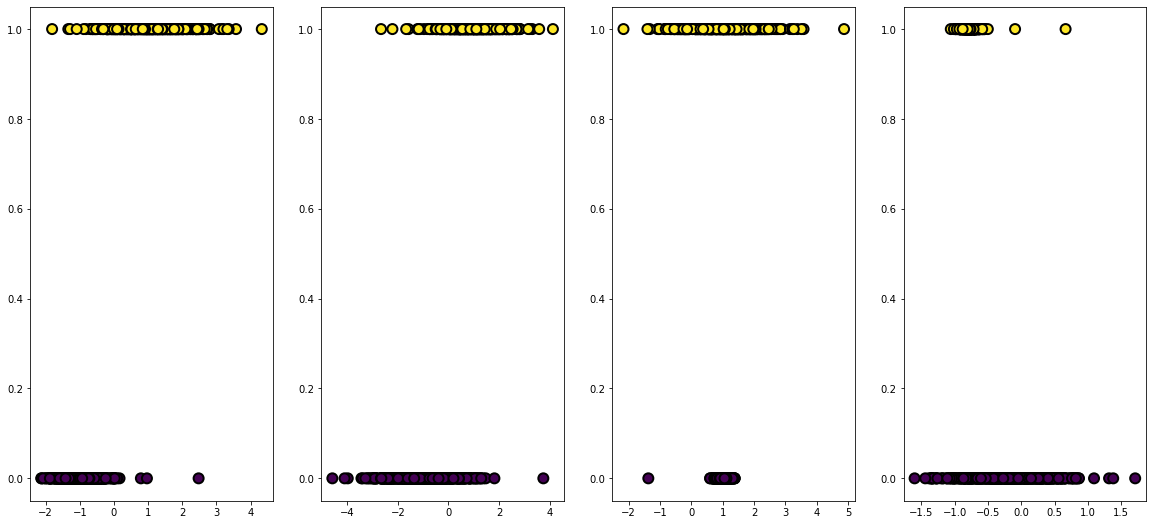

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.scatter(x_train[:,0], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,2)
plt.scatter(x_train[:,1], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,3)
plt.scatter(x_train[:,2], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,4)
plt.scatter(x_train[:,3], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.show()

In [6]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [7]:
# wine data의 dataframe화
df_wine = pd.DataFrame(data= wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df_wine['class'] = sy

In [8]:
# corr를 이용해 wine data릐 feature들 간의 correlation 값 측정 후 정렬
corrcoef_wine = df_wine.corr()
pd.set_option('display.max_rows', 200)
corrcoef_wine.unstack().sort_values()

malic_acid                    hue                            -0.561296
hue                           malic_acid                     -0.561296
nonflavanoid_phenols          flavanoids                     -0.537900
flavanoids                    nonflavanoid_phenols           -0.537900
hue                           color_intensity                -0.521813
color_intensity               hue                            -0.521813
od280/od315_of_diluted_wines  nonflavanoid_phenols           -0.503270
nonflavanoid_phenols          od280/od315_of_diluted_wines   -0.503270
total_phenols                 nonflavanoid_phenols           -0.449935
nonflavanoid_phenols          total_phenols                  -0.449935
proline                       alcalinity_of_ash              -0.440597
alcalinity_of_ash             proline                        -0.440597
color_intensity               od280/od315_of_diluted_wines   -0.428815
od280/od315_of_diluted_wines  color_intensity                -0.428815
flavan

In [9]:
import seaborn as sns

In [120]:
# 높은 correlation의 feature들만 뽑아 새로운 data frame으로 생성
col = [0, 6 ,8, 11, 12]
high_coef_df = pd.DataFrame(data= wine.data[:,(col)], columns=[wine.feature_names(col)])

TypeError: 'list' object is not callable

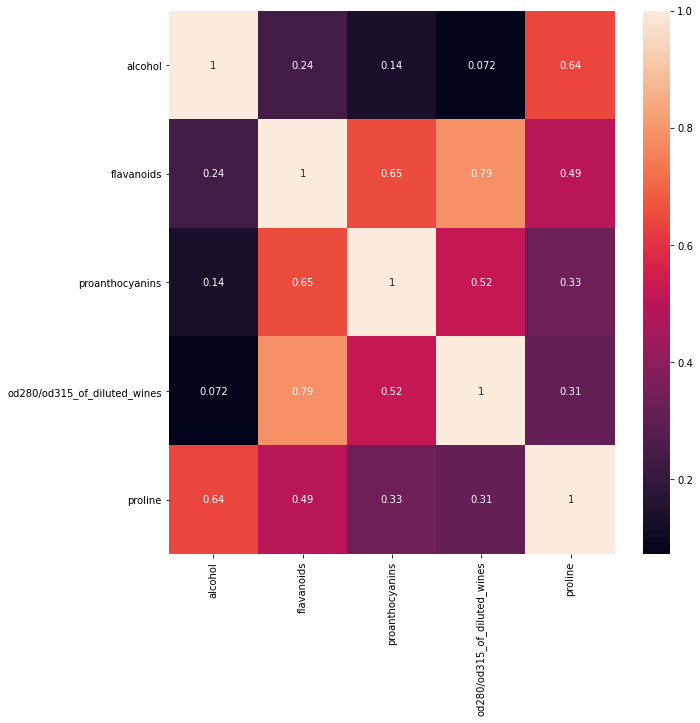

In [11]:
# 해당 feature들의 heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(high_coef_df.corr(), annot=True)

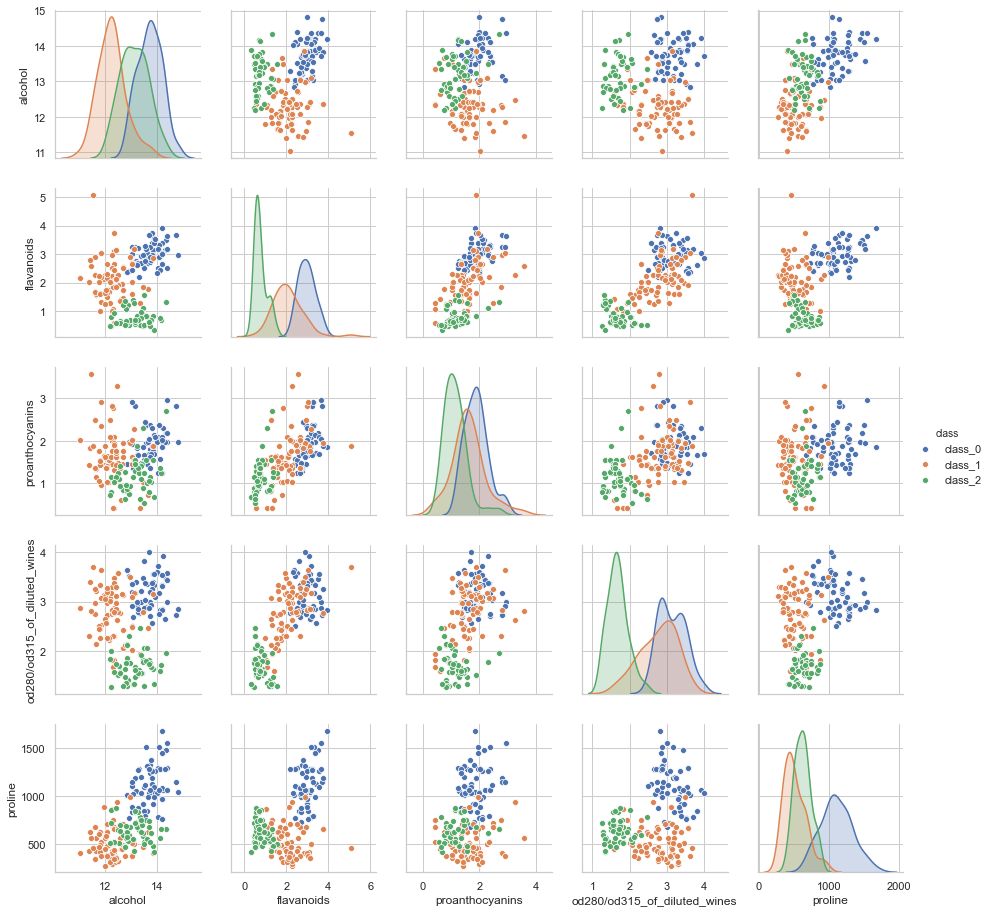

In [12]:
# 해당 feature들로의 wine data EDA
sns.set(style='whitegrid', context='notebook')
cols = ['alcohol', 'flavanoids', 'proanthocyanins', 'od280/od315_of_diluted_wines', 'proline']
sns.pairplot(vars=cols, height= 2.5, hue='class', data=df_wine)
plt.show()

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [44]:
X = wine.data[:,(0, 6, 8, 11, 12)]
y = wine.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [51]:
logreg = LogisticRegression(multi_class='multinomial', penalty='l2', solver='newton-cg')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
print("accuracy : {:.3f}".format(logreg.score(X_test, y_test)))

accuracy : 0.944


In [104]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

In [105]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)

In [106]:
# lr = LinearRegression(fit_intercept=True)

# for n in range(1, 7):
#     var_sel = SequentialFeatureSelector(lr,
#                k_features=n,
#                forward=True,
#                floating=False,
#                verbose=2,
#                scoring='accuracy',
#                cv=5)
#     var_sel = var_sel.fit(x_train, y_train)
#     sel_features = list(var_sel.k_feature_idx_)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [112]:
lr = LinearRegression(fit_intercept=True)
lrmodel1 = lr.fit(x_train, y_train)

In [113]:
coef_lr = pd.Series(lrmodel1.coef_, index=wine.feature_names)

In [114]:
print(coef_lr.sort_values())

flavanoids                     -0.350303
od280/od315_of_diluted_wines   -0.280142
hue                            -0.179596
nonflavanoid_phenols           -0.167460
alcohol                        -0.093990
ash                            -0.060359
proline                        -0.000759
magnesium                      -0.000336
malic_acid                      0.023853
alcalinity_of_ash               0.035313
color_intensity                 0.070813
proanthocyanins                 0.071153
total_phenols                   0.112274
dtype: float64


In [115]:
r2 = r2_score(y_train, lrmodel1.predict(x_train))
print(r2)

0.9033102657117956


In [116]:
n = len(x_train)
r2_adj =1- (1-r2)*(n-1)/(n-(13+1))
r2_adj

0.8947009058094213